## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [2]:
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [3]:
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [4]:
# Combine the data into a single dataset
mouse_study_data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

# Display the data table for preview
mouse_study_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
# Checking the number of mice.
no_of_mice = mouse_metadata["Mouse ID"].count()
print(f"Total number of mice : {no_of_mice}")

Total number of mice : 249


In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = pd.Series(mouse_study_data[mouse_study_data.duplicated(["Mouse ID","Timepoint"])]["Mouse ID"].unique())
print(f"The mice id(s) for duplicate Mouse ID, Timepoint : {duplicate_mice.values}")

The mice id(s) for duplicate Mouse ID, Timepoint : ['g989']


In [7]:
# # Optional: Get all the data for the duplicate mouse ID. 
mouse_study_data[mouse_study_data[["Mouse ID", "Timepoint"]].duplicated(keep=False)]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

# Get the index/indices of the rows that have the duplicating mouse ids 
getIndex = mouse_study_data[ mouse_study_data['Mouse ID'].isin (duplicate_mice) ].index
# Drop the rows with the above indices
mouse_study_data.drop(getIndex , inplace=True)

In [9]:
# Checking the number of mice in the clean DataFrame.
no_of_mice = mouse_study_data["Mouse ID"].unique()
len(no_of_mice)

248

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.

# Group the dataset by drug name
groupby_regimen = mouse_study_data.groupby("Drug Regimen")
# Calculate the summary statistics data 
summary_df = pd.DataFrame({
    "Mean" : groupby_regimen["Tumor Volume (mm3)"].mean(),
    "Median" : groupby_regimen["Tumor Volume (mm3)"].median(),
    "StdDev" : groupby_regimen["Tumor Volume (mm3)"].std(),
    "Variance" : groupby_regimen["Tumor Volume (mm3)"].var(),
    "SEM" : groupby_regimen["Tumor Volume (mm3)"].var(),
})
summary_df

,Mean,Median,StdDev,Variance,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,4.994774,24.947764,24.947764
Ceftamin,52.591172,51.776157,6.268188,39.290177,39.290177
Infubinol,52.884795,51.820584,6.567243,43.128684,43.128684
Ketapril,55.235638,53.698743,8.279709,68.553577,68.553577
Naftisol,54.331565,52.509285,8.134708,66.173479,66.173479
Placebo,54.033581,52.288934,7.821003,61.168083,61.168083
Propriva,52.320930,50.446266,6.622085,43.852013,43.852013
Ramicane,40.216745,40.673236,4.846308,23.486704,23.486704
Stelasyn,54.233149,52.431737,7.710419,59.450562,59.450562


In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function

groupby_regimen = mouse_study_data.groupby('Drug Regimen')
aggregate_df = groupby_regimen["Tumor Volume (mm3)"].agg(['mean', 'median', 'std', 'var', 'sem'])
aggregate_df


,mean,median,std,var,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,4.994774,24.947764,0.329346
Ceftamin,52.591172,51.776157,6.268188,39.290177,0.469821
Infubinol,52.884795,51.820584,6.567243,43.128684,0.492236
Ketapril,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,54.331565,52.509285,8.134708,66.173479,0.596466
Placebo,54.033581,52.288934,7.821003,61.168083,0.581331
Propriva,52.320930,50.446266,6.622085,43.852013,0.544332
Ramicane,40.216745,40.673236,4.846308,23.486704,0.320955
Stelasyn,54.233149,52.431737,7.710419,59.450562,0.573111


## Bar and Pie Charts

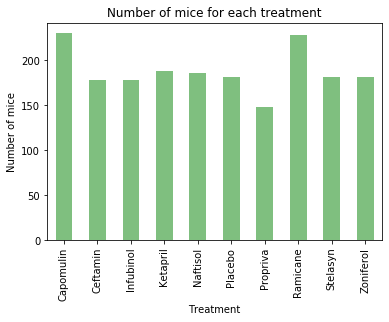

In [12]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

# Extract the drug/treatment names
treatment_mice_count = mouse_study_data.groupby("Drug Regimen")["Mouse ID"].count()

# Plot the bar chart
treat_mice_plot =  treatment_mice_count.plot(kind="bar", color="green", alpha=0.5, title="Number of mice for each treatment")
# Set the x-axis label
treat_mice_plot.set_xlabel("Treatment")
# Set the y-axis label
treat_mice_plot.set_ylabel("Number of mice")
plt.show()

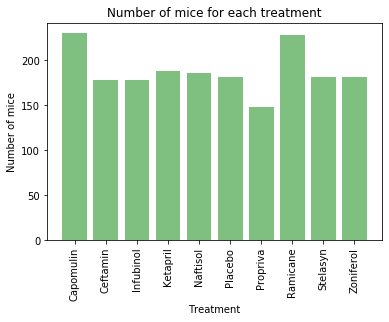

In [13]:
# Generate a bar plot showing the total number of mice for each treatment throughout 
# the course of the study using pyplot.

treat_mice_count = mouse_study_data.groupby("Drug Regimen")["Mouse ID"].count()
treatments = treat_mice_count.index

plt.title("Number of mice for each treatment")
plt.xlabel("Treatment")
plt.ylabel("Number of mice")
plt.bar(treatments, treat_mice_count, color="green", alpha=0.5)
plt.xticks(rotation=90)
plt.show()

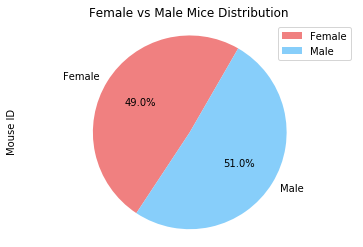

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
groupby_gender = mouse_study_data.groupby("Sex")
mouse_count = groupby_gender["Mouse ID"].count()

# Labels for each section
labels = mouse_count.index

# Colors for each section of the pie chart
colors = ["lightcoral", "lightskyblue"]
# Plot the pie chart
mouse_count.plot(kind="pie", labels=labels, colors=colors, title="Female vs Male Mice Distribution", autopct="%1.1f%%", startangle=60)
plt.legend(mouse_count.index)
plt.axis("equal")
plt.show()

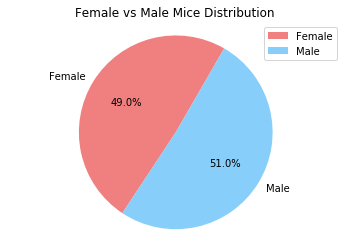

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Labels for each section
labels = mouse_count.index

# Colors for each section of the pie chart
colors = ["lightcoral", "lightskyblue"]
# Plot the pie chart
plt.pie(mouse_count, labels=labels, colors=colors, autopct="%1.1f%%", startangle=60)
plt.title("Female vs Male Mice Distribution")
plt.legend(mouse_count.index)
plt.axis("equal")
plt.show()


## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
drug_names = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
mouse_treat_df = mouse_study_data.loc[mouse_study_data["Drug Regimen"].isin(drug_names)]

# Start by getting the last (greatest) timepoint for each mouse
# Get the last/max timepoint for each mouse 
timepoint_df = mouse_treat_df.groupby("Mouse ID")["Timepoint"].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
drug_time_merge_df = pd.merge(timepoint_df , mouse_treat_df, on=["Mouse ID","Timepoint"], how="inner")
# Display the merged data
drug_time_merge_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
95,y769,45,Ceftamin,Female,6,27,68.594745,4
96,y793,45,Capomulin,Male,17,17,31.896238,2
97,y865,45,Ceftamin,Male,23,26,64.729837,3
98,z578,45,Ramicane,Male,11,16,30.638696,0


In [17]:
# Put treatments into a list for for loop (and later for plot labels)

drug_names = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
drug_data_list = []

# Extract the tumor volume for each drug treatment
for eachdrug in drug_names:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    drug_tvolume = mouse_study_data.loc[mouse_study_data["Drug Regimen"] == eachdrug]["Tumor Volume (mm3)"]
    
    # add subset 
    drug_data_list.append(drug_tvolume)

    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = drug_tvolume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = drug_tvolume.loc[(drug_tvolume < lower_bound) | (drug_tvolume > upper_bound)]
    
    # Display the results
    print(f"\n{eachdrug}")
    print(f"   Number of observatios  : {len(drug_tvolume)}")
    print(f"   Quartile Values  : {quartiles.values} ,  IQR : {iqr}")
    if len(outliers) == 0:
        out_value = "None"
    else:
        out_value = outliers.values
    print(f"   Outliers for {eachdrug} : {out_value}")    


Capomulin
   Number of observatios  : 230
   Quartile Values  : [37.68593286 41.55780888 45.        ] ,  IQR : 7.314067135000002
   Outliers for Capomulin : [25.47214326 23.34359787]

Ramicane
   Number of observatios  : 228
   Quartile Values  : [36.67463458 40.67323554 45.        ] ,  IQR : 8.325365415000007
   Outliers for Ramicane : [22.05012627]

Infubinol
   Number of observatios  : 178
   Quartile Values  : [47.3123533  51.82058438 57.31444397] ,  IQR : 10.002090667500006
   Outliers for Infubinol : None

Ceftamin
   Number of observatios  : 178
   Quartile Values  : [47.20842711 51.77615728 56.80143757] ,  IQR : 9.5930104575
   Outliers for Ceftamin : None


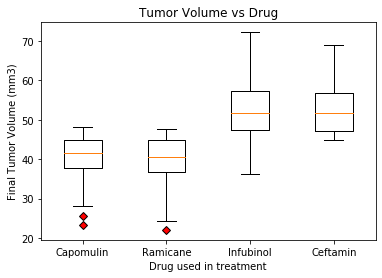

In [18]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
mark_outlier = dict(markerfacecolor='r', marker='D')
labels = drug_names
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume vs Drug')
ax1.set_xlabel('Drug used in treatment')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(drug_data_list, labels=labels, flierprops=mark_outlier)
plt.show()

## Line and Scatter Plots

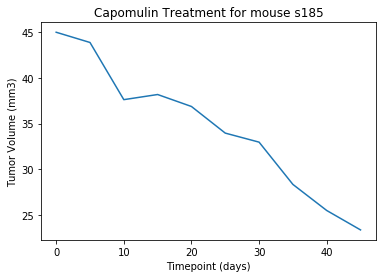

In [19]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

Capomulin_df = mouse_study_data.loc[mouse_study_data["Drug Regimen"]=="Capomulin"]
mouse_id = Capomulin_df.iloc[0,0]
t_volume = Capomulin_df.loc[Capomulin_df["Mouse ID"]==mouse_id] 
plt.plot(t_volume["Timepoint"], t_volume["Tumor Volume (mm3)"])
plt.title("Capomulin Treatment for mouse " + mouse_id)
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

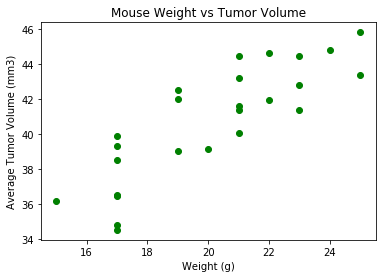

In [20]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
 
avg_tvolume = Capomulin_df.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
merge_df = pd.merge(mouse_metadata, avg_tvolume, on="Mouse ID", how="inner")

x_axis = merge_df["Weight (g)"]
y_axis = merge_df["Tumor Volume (mm3)"]
plt.scatter(x_axis, y_axis, color='g')
plt.title("Mouse Weight vs Tumor Volume")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

In [21]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

weight = merge_df["Weight (g)"]
t_volume = merge_df["Tumor Volume (mm3)"]
correlation = sts.pearsonr(weight,t_volume)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.84


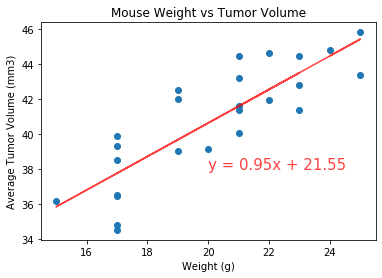

In [22]:
# Add the linear regression equation and line to plot

x_values = merge_df["Weight (g)"]
y_values = merge_df["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-", alpha=0.75)
plt.annotate(line_eq,(20,38),fontsize=15, color="red", alpha=0.75)
plt.title("Mouse Weight vs Tumor Volume")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()